In [2]:
%matplotlib inline

import json
import requests

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [3]:
pe12_select_dataset = requests.get('http://172.31.6.14:16000/metrics').json()
pe13_select_dataset = requests.get('http://172.31.4.40:16000/metrics').json()

In [4]:
def collect(metrics, version):
    for command, timer in metrics['timers'].items():
        if command.startswith('com.adatao.pa.rest.CommandServlet'):
            record = {
                'version': version,
                'command': command.replace('com.adatao.pa.rest.CommandServlet.', '', 1)
            }
            for key in ('count', 'min', 'max', 'mean', 'p50', 'p95', 'stddev'):
                record[key] = timer[key]
            yield record
        
timers_select_dataset = list(collect(pe12_select_dataset, '1.4.12')) + list(collect(pe13_select_dataset, '1.4.13'))
print len(timers_select_dataset)
timers_select_dataset[0]

17


{'command': u'nrow',
 'count': 2,
 'max': 1.7108072490000001,
 'mean': 0.4061384571897012,
 'min': 0.173681637,
 'p50': 0.173681637,
 'p95': 1.7108072490000001,
 'stddev': 0.5507078706037906,
 'version': '1.4.12'}

In [5]:
df_select_dataset = pd.DataFrame(timers_select_dataset)
df_select_dataset.head()

,command,count,max,mean,min,p50,p95,stddev,version
0,nrow,2,1.710807,0.406138,0.173682,0.173682,1.710807,0.550708,1.4.12
1,geturi,4,0.039999,0.029472,0.023033,0.033591,0.039999,0.005802,1.4.12
2,getddf,6,4.782692,0.274596,0.036410,0.036513,0.060302,1.031747,1.4.12
3,getauthenticateddatasources,3,0.355733,0.022008,0.001207,0.001207,0.355733,0.082236,1.4.12
4,quicksummary,2,0.177638,0.141873,0.135501,0.135501,0.177638,0.015097,1.4.12


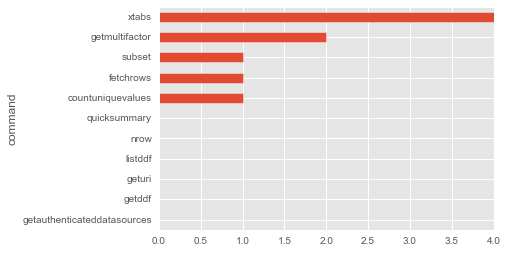

In [108]:
pe12_data_select_dataset = df_select_dataset[df_select_dataset.version == '1.4.12'].set_index('command')
pe13_data_select_dataset = df_select_dataset[df_select_dataset.version == '1.4.13'].set_index('command')

# difference in no. calls between 1.4.12 and 1.4.13
count_diff = pe13_data_select_dataset['count'].subtract(pe12_data_select_dataset['count'], fill_value=0) / 2
count_diff.sort_values().plot.barh()

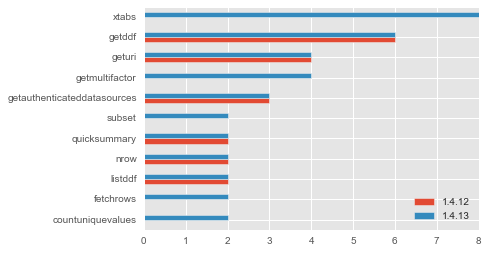

In [8]:
count_compare = pd.concat([pe12_data_select_dataset['count'], pe13_data_select_dataset['count']], axis=1)
count_compare.columns = ['1.4.12', '1.4.13']

# difference in number of calls per 
count_compare.sort_values('1.4.13').plot.barh()

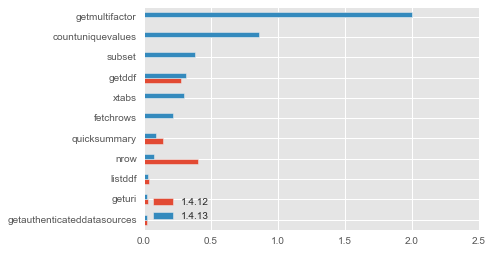

In [9]:
mean_compare = pd.concat([pe12_data_select_dataset['mean'], pe13_data_select_dataset['mean']], axis=1)
mean_compare.columns = ['1.4.12', '1.4.13']

# difference in number of calls per 
mean_compare.sort_values('1.4.13').plot.barh()

In [15]:
pe12_top_company_by_profits = requests.get('http://172.31.6.14:16000/metrics').json()
pe13_top_company_by_profits = requests.get('http://172.31.4.40:16000/metrics').json()

In [16]:
timers_top_company_by_profits = list(collect(pe12_top_company_by_profits, '1.4.12')) + list(collect(pe13_top_company_by_profits, '1.4.13'))
print len(timers_top_company_by_profits)
df_top_company_by_profits = pd.DataFrame(timers_top_company_by_profits)
df_top_company_by_profits.head()

8


,command,count,max,mean,min,p50,p95,stddev,version
0,connect,1,0.150492,0.150492,0.150492,0.150492,0.150492,0.000000,1.4.12
1,getddf,3,5.290413,0.505857,0.034708,0.034708,5.290413,1.492402,1.4.12
2,groupby,2,3.126548,1.131570,0.344445,0.344445,3.126548,1.253115,1.4.12
3,topn,2,7.078297,2.343117,0.236634,0.236634,7.078297,3.158255,1.4.12
4,connect,1,0.149564,0.149564,0.149564,0.149564,0.149564,0.000000,1.4.13


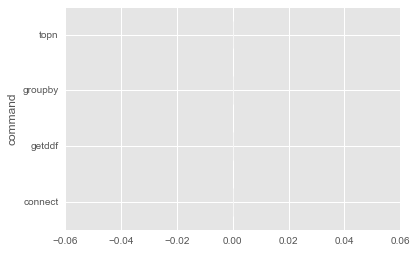

In [17]:
pe12_data_top_company_by_profits = df_top_company_by_profits[df_top_company_by_profits.version == '1.4.12'].set_index('command')
pe13_data_top_company_by_profits = df_top_company_by_profits[df_top_company_by_profits.version == '1.4.13'].set_index('command')

# difference in no. calls between 1.4.12 and 1.4.13
count_diff = pe13_data_top_company_by_profits['count'].subtract(pe12_data_top_company_by_profits['count'], fill_value=0)
count_diff.sort_values().plot.barh()

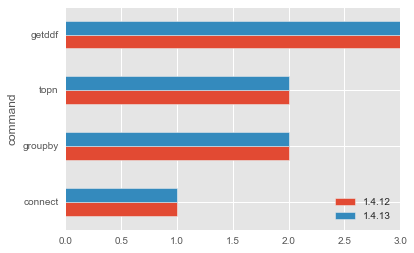

In [19]:
count_compare = pd.concat([pe12_data_top_company_by_profits['count'], pe13_data_top_company_by_profits['count']], axis=1)
count_compare.columns = ['1.4.12', '1.4.13']

# difference in number of calls per 
count_compare.sort_values('1.4.13').plot.barh()

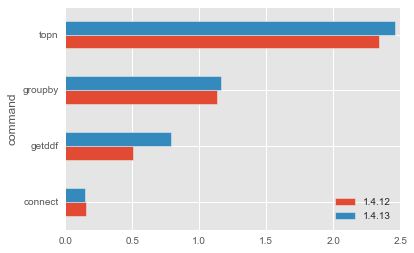

In [18]:
mean_compare = pd.concat([pe12_data_top_company_by_profits['mean'], pe13_data_top_company_by_profits['mean']], axis=1)
mean_compare.columns = ['1.4.12', '1.4.13']

# difference in number of calls per 
mean_compare.sort_values('1.4.13').plot.barh()

In [21]:
import re
df
with open('data/testbot_report1.12.html') as f:
    html = f.read()

In [33]:
match = re.search(r'query: ([a-z ]+).*?Query time: ([\d:.]+)', html)
match.groups()

('show relationship between assets and continent for each country', '00:03.45')

In [37]:
for groups in re.findall(r'query: ([a-z ]+).*?query time: ([\d:.]+)', html, flags=re.IGNORECASE):
    print groups

('show relationship between assets and continent for each country', '00:03.45')
('show distribution of continent', '00:02.14')
('sector vs sales', '00:02.69')
('show first ', '00:02.25')
('describe assets', '00:02.28')
('summary statistics', '00:02.30')
('show value of number', '00:02.28')
('max of profits', '00:02.30')
('min of sales', '00:02.28')
('what is the average of rank', '00:02.31')
('what is the sum of marketvalue', '00:02.31')
('what is the median of assets', '00:02.28')
('how many rows are there per sector', '00:02.28')
('which company has the highest profits', '00:07.41')
('show relationship between sales and assets for each continent', '00:02.33')
('show relationship between assets and marketvalue for each continent', '00:02.33')
('which continent has the highest profits', '00:02.69')
('plot density heatmap of assets by country and sector', '00:02.74')
('show relationship between number', '00:02.44')
('forecast avgdailypoints in the next ', '00:04.46')
('show daily active

In [42]:
def parse_time(time_str):
    match = re.match('(\d\d):([\d.]+)', time_str)
    if match:
        return 60 * int(match.group(1)) + float(match.group(2))

parse_time('00:02.6')

2.6

In [93]:
def parse_report(path):
    with open(path) as f:
        html = f.read()
    for query, time in re.findall(r'query: ([a-z ]+).*?query time: ([\d:.]+)', html, flags=re.IGNORECASE):
        seconds = parse_time(time)
        yield query, seconds

report = []
for path in ('data/testbot_report1.12.html', 'data/testbot_report2.12.html', 'data/testbot_report3.12.html'):
    for query, seconds in parse_report(path):
        report.append(dict(query=query, time=seconds, version='1.4.12.3'))
for path in ('data/testbot_report1.13.html', 'data/testbot_report2.13.html', 'data/testbot_report3.13.html'):
    for query, seconds in parse_report(path):
        report.append(dict(query=query, time=seconds, version='1.4.13.1'))
df = pd.DataFrame(report)
df

,query,time,version
0,show relationship between assets and continent...,3.45,1.4.12.3
1,show distribution of continent,2.14,1.4.12.3
2,sector vs sales,2.69,1.4.12.3
3,show first,2.25,1.4.12.3
4,describe assets,2.28,1.4.12.3
5,summary statistics,2.30,1.4.12.3
6,show value of number,2.28,1.4.12.3
7,max of profits,2.30,1.4.12.3
8,min of sales,2.28,1.4.12.3
9,what is the average of rank,2.31,1.4.12.3


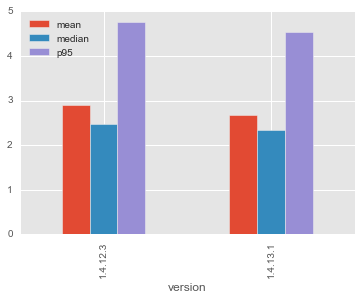

In [94]:
def p95(arr):
    return np.percentile(arr, 95)

df.groupby('version').agg({'time': [np.mean, np.median, p95]})['time'].plot.bar()

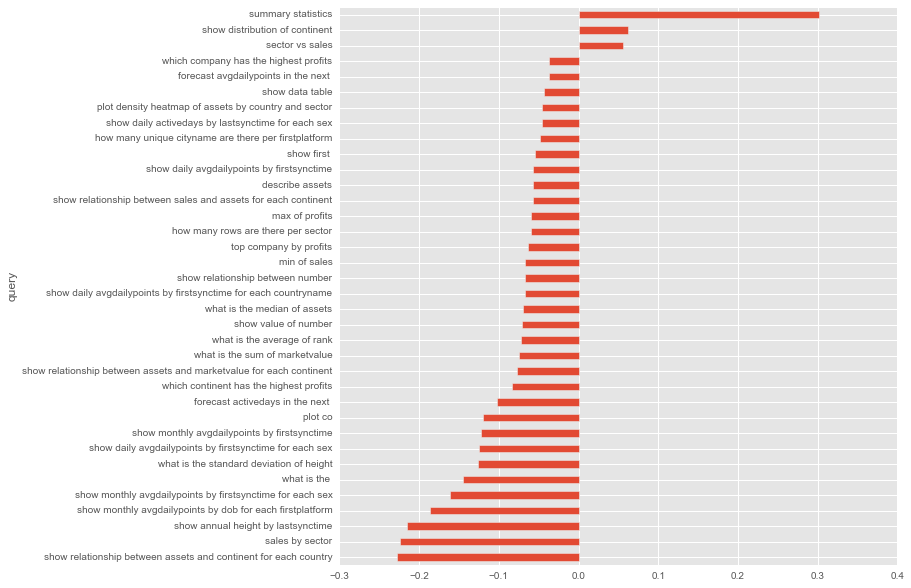

In [95]:
v12_mean = df[df['version'] == '1.4.12.3'].groupby('query').mean()
v13_mean = df[df['version'] == '1.4.13.1'].groupby('query').mean()

mean_diff = (v13_mean['time'] - v12_mean['time']) / v12_mean['time']
plt.figure(figsize=(10,10))
mean_diff.sort_values().plot.barh()

In [96]:
def parse_report_connect_time(path):
    with open(path) as f:
        html = f.read()
    for dataset, time in re.findall(r'connect to dataset ([a-z0-9_]+): ([\d:.]+)', html, flags=re.IGNORECASE):
        seconds = parse_time(time)
        yield dataset, seconds

report = []
for path in ('data/testbot_report1.12.html', 'data/testbot_report2.12.html', 'data/testbot_report3.12.html'):
    for dataset, seconds in parse_report_connect_time(path):
        report.append(dict(dataset=dataset, time=seconds, version='1.4.12.3'))
for path in ('data/testbot_report1.13.html', 'data/testbot_report2.13.html', 'data/testbot_report3.13.html'):
    for dataset, seconds in parse_report_connect_time(path):
        report.append(dict(dataset=dataset, time=seconds, version='1.4.13.1'))
connect_df = pd.DataFrame(report)
connect_df

,dataset,time,version
0,forbes,12.80,1.4.12.3
1,activity20,6.83,1.4.12.3
2,forbes,2.99,1.4.12.3
3,forbes,2.35,1.4.12.3
4,activity20,2.00,1.4.12.3
5,forbes,3.30,1.4.12.3
6,forbes,2.37,1.4.12.3
7,activity20,2.20,1.4.12.3
8,forbes,3.11,1.4.12.3
9,forbes,19.15,1.4.13.1


In [97]:
# removing the 2 1st-time connect for each run because that including the ddf restore time
connect_df = connect_df[connect_df.time < 6]
connect_df

,dataset,time,version
2,forbes,2.99,1.4.12.3
3,forbes,2.35,1.4.12.3
4,activity20,2.00,1.4.12.3
5,forbes,3.30,1.4.12.3
6,forbes,2.37,1.4.12.3
7,activity20,2.20,1.4.12.3
8,forbes,3.11,1.4.12.3
11,forbes,4.40,1.4.13.1
12,forbes,4.11,1.4.13.1
13,activity20,4.29,1.4.13.1


In [98]:
grp = connect_df.groupby(['version', 'dataset']).mean()
grp

time
version  dataset          
1.4.12.3 activity20  2.100
         forbes      2.824
1.4.13.1 activity20  4.295
         forbes      4.164

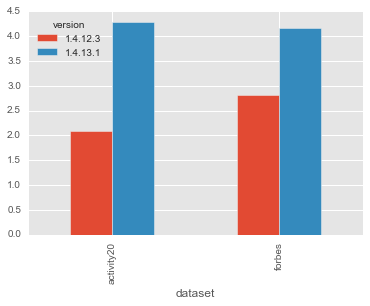

In [99]:
grp.unstack('version')['time'].plot.bar()

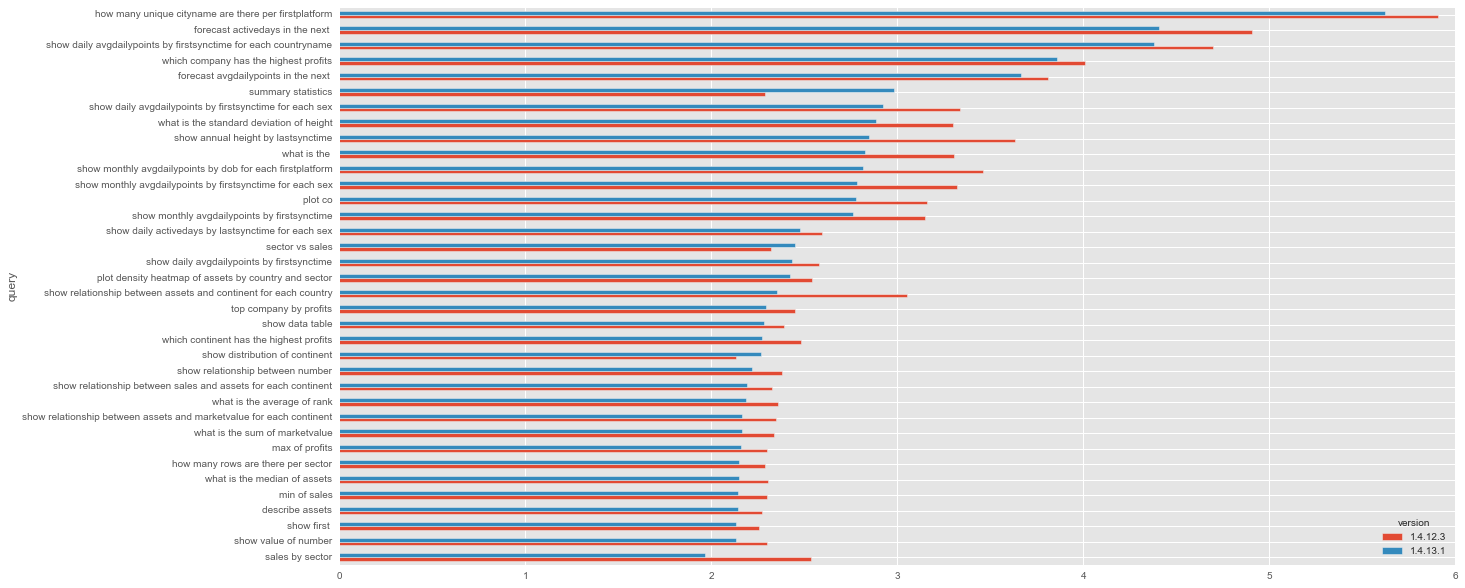

In [107]:
grp = df.groupby(['version', 'query']).mean()
plot = grp.unstack('version')['time'].sort_values('1.4.13.1').plot
plot.barh(figsize=(20,10))